# Spotify top streamed songs in 2023!

**Questions:**
- Top 10 artists with most songs streamed?<br>
- Top 10 most streamed songs<br>
- How does an artist's total number of songs correlate to the total number of streams?
- Distribution of songs based its characteristics? (Danceability, Valence, Energy, Acousticness, Instrumentalness, Liveness, Speechiness)<br>
    - How do these correlate to the song's popularity?
- What is the distribution on the song's tempo (BPM)?<br>
    - Is there a correlation between the song's BPM and its characteristics?<br>
- What's the distribution of the song's key for this list?<br>  
- Which ones are in Major or in Minor? (Major are mostly associated as a "happy" song as opposed to Minor being "sad")<br>
[Dataset source](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

## Preparation
Let's begin by importing the necessary packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import the dataset**<br>
Take a quick look at the data and the structure of the data.

In [3]:
myData = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
myData.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
myData.info()
myData.isnull().sum()
myData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Cleaning the data 
Some possible areas that need to be cleaned:
- There are null values in columns "in_shazam_charts" and "key". I'm going to put 0 for null in shazam charts.<br>
- After manual inspection in a spreadsheet, the tracks with null values in the 'key' column all have a song key of either C major or C minor. So, I will replace null with 'C' in the 'key' column.<br>
- The "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be of number datatype so converting it into int64 type.<br>
<br>

Fixing null values:

In [5]:
#Replacing null with 0 in shazam charts
myData['in_shazam_charts'].fillna(0, inplace=True)
#Replacing numm with 'C' in key
myData['key'].fillna('C', inplace=True)
#count all the data with null value. A 0 outpout means there are no null values
myData.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

**Duplicate clean-up**

In [6]:
#checking duplicated entries
duplicates = myData[myData.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]
print(f"Duplicate entries: {num_duplicates}")

Duplicate entries: 0


**Data type conversion**<br>
Now, the "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be a number so converting it into integer type.<br>
While we're at it, let's also remove any non-numeric values in columns that are supposed to have numbers only.

In [7]:
myData['streams'] = myData['streams'].astype('Int64')

ValueError: invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

**Data type error**<br>
The error shows that there are entries in the `streams` columns containing non-numeric values. 

In [8]:
# Filter rows where 'streams' column cannot be converted to a number
non_numeric_rows = myData[~myData['streams'].str.isnumeric()]['streams']
print(non_numeric_rows)

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [9]:
#found the culprit with index 574. Going to drop this row since I do not have the info on its stream count
myData = myData.drop(574)
#converting again
myData['streams'] = myData['streams'].astype('Int64')

In [11]:
#continue the conversion
myData['in_deezer_playlists'] = myData['in_deezer_playlists'].astype('Int64')

ValueError: invalid literal for int() with base 10: '2,445'

**Data type error 2**<br>
Another error but this time it suggests that it tried to convert this value '2,445' which means the character comma cannot be converted to integer so I'm going to normalize all the entries here and remove the commas.

In [12]:
myData['in_deezer_playlists'] = myData['in_deezer_playlists'].str.replace(',', '').astype('Int64')
#I will perform the same in 'in_shazam_charts' just in case
myData['in_shazam_charts'] = myData['in_shazam_charts'].str.replace(',', '').astype('Int64')

In [13]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    Int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    Int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    Int64 
 14  bpm                   952 non-null    int64 
 15  key                   952 non-null    object


## EDA
Time to answer our questions with some visualizations!

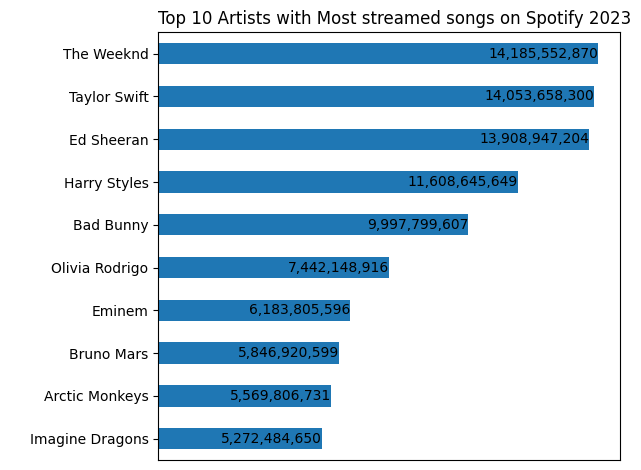

In [14]:
grouped_df = myData.groupby('artist(s)_name').sum().reset_index()                           #grouping artist names then add their total streams
grouped_df['streams_formatted'] = grouped_df['streams'].apply(lambda x: '{:,}'.format(x))   #make new column for stream count but add number format with commas for better readability
grouped_df = grouped_df.sort_values(by='streams', ascending=False).head(10)                 #sorting data by total stream, descending order
grouped_df = grouped_df.sort_values(by='streams')                                           #sort again, highest streams will be in bottom but they will be plotted at the top in the chart, because pandas
ax = grouped_df.plot(kind = 'barh', x = 'artist(s)_name', y = 'streams', legend = False)    #save the plot to variable for use later
                                                                                            
for index, (value, formatted_value) in enumerate(zip(grouped_df['streams'], grouped_df['streams_formatted'])):  #iterate through all values to make the stream count embedded into the bars
    text_position = value
    ax.text(text_position, index, formatted_value, color='black', va='center', ha='right')

ax.set_title('Top 10 Artists with Most streamed songs on Spotify 2023', x = 0, ha = 'left') 
plt.ylabel(' ')
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()

**Top 10 Artists with Most streamed songs on Spotify 2023**<br><br>
The Weeknd is the most streamed artist in Spotify for 2023 at a staggering 14.1 billion streams <br>
Followed by Taylor Swift at 14 billion <br>
Then by Ed Sheeran at 13.9 billion<br>
Harry Styles at 11.6 billion<br>
Bad Bunny at 9.9 billion<br>
Olivia Rodrigo at 7.4 billion <br>
Eminem at 6.1 billion<br>
Bruno Mars at 5.8 billion<br>
Arctic Monkeys at 5.5 billion<br>
and Imagine Dragons at 5.2 billion<br>

Next, I'm going to look at the top 10 most streamed songs

In [15]:
myData[['track_name','artist(s)_name','streams']].sort_values(by='streams', ascending=False).head(10)

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


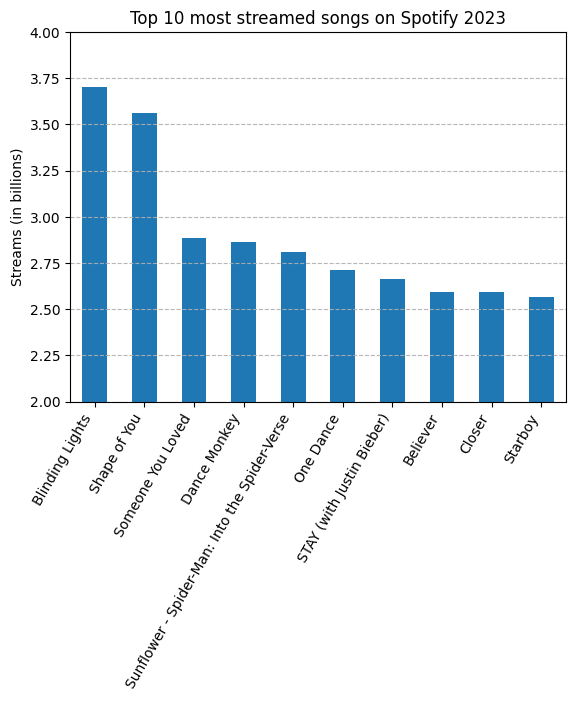

In [16]:
#and visualize
format_df = myData
format_df['streams_formatted'] = myData['streams'] / 1e9
format_df = format_df.sort_values(by='streams', ascending=False).head(10)
ax = format_df.plot(kind = 'bar', y = 'streams_formatted', x = 'track_name', legend = False)
ax.set_title('Top 10 most streamed songs on Spotify 2023')
plt.gca().set_ylim(2, 4)
plt.xlabel(' ')
plt.xticks(rotation = 60, ha = 'right')
plt.ylabel('Streams (in billions)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

**Top 10 most streamed songs on Spotify 2023**<br><br>
Blinding Lights by The Weeknd takes the #1 spot on the most streamed Spotify song in 2023 at 3.7 billion<br>
Shape of You by Ed Sheeran at 3.56 billion<br>
Someone You Loved by Lewis Capaldi at 2.88 billion<br>
Dance Monkey by Tones and I at 2.86 billion<br>
Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee at 2.8 billion<br>
One Dance by Drake, WizKid, Kyla t 2.71 billion<br>
STAY (with Justin Bieber) by Justin Bieber, The Kid Laroi at 2.66 billion<br>
Believer by Imagine Dragons at 2.59 billion<br>
Closer by The Chainsmokers, Halsey at 2.59 billion<br>
Starboy by The Weeknd, Daft Punk at 2.56 billion<br>

**Stream count and Song count correlation**<br>
Though The Weeknd have 2 songs in the top 10 most streamed and none of Taylor Swift's songs made it here given that she's the most streamed artist on Spotify 2023, this suggests that Taylor Swift have multiple songs with a huge number of streams or The Weeknd have a few songs but majority of them have high stream count.

With this in mind, how does the total number of songs correlate to an artist's total number of streams?

In [17]:
most_songs = myData['artist(s)_name'].value_counts().reset_index()
most_songs.columns = ['Artist', 'Number of Songs']
most_songs.head(10)

,Artist,Number of Songs
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17
5,Kendrick Lamar,12
6,Morgan Wallen,11
7,Ed Sheeran,9
8,Feid,8
9,"Drake, 21 Savage",8


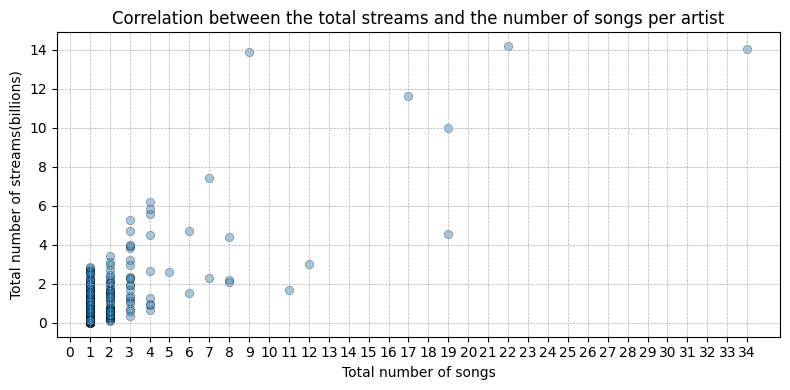

In [18]:
total_streams = myData.groupby('artist(s)_name')['streams'].sum() / 1e9     #combining data by artists and sum their total streams
total_songs = myData.groupby('artist(s)_name').size()                       #total count of songs by the artist
combined_df = pd.DataFrame({                                                #combine again for use in the scatterplot
    'total_streams' : total_streams,
    'total_songs': total_songs
}).reset_index()
plt.figure(figsize=(8, 4))
plt.scatter(combined_df['total_songs'], combined_df['total_streams'], alpha = 0.4, edgecolors = 'k', linewidth = 0.5)
plt.title('Correlation between the total streams and the number of songs per artist')
plt.xlabel('Total number of songs')
plt.xticks(range(0, 35, 1))
plt.ylabel('Total number of streams(billions)')
plt.grid(True, which = 'both', ls = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

**Findings: Stream count and Song count correlation**<br>
The chart appears to be suggesting a positive correlation but it may be difficult to discern due to the sheer amount of artists with only 1 or 2 songs. In this case, we'll try to compare it directly using correlation coefficient.

The resulting value is defined as:
- A value closer to 1 means a strong positive correlation 
- A value close to -1 is negative correlation
- A value near 0 means very little or no linear correlation.

In [19]:
corr = combined_df['total_songs'].corr(combined_df['total_streams'])
print(f"Correlation coefficient: {corr: .2f}")

Correlation coefficient:  0.78


**Findings: Correlation coefficient- Stream count and Song count**<br>
We got a 0.78 which is closer to 1 so this suggests, along with the chart, that the total number of songs has a positive correlation to the total number of streams.<br><br>

**Song characteristics and their definition:**
- __Danceability__: refers to how suitable a track is for dancing.
- __Valence__: refers to the musical positiveness conveyed by a track. Songs with high valence sound more positive (happy, cheerful, euphoric), while songs with low valence sound more negative (sad, depressed, angry).
- __Energy__: refers to the intensity and activity present in a track. It's a measure of how fast, loud, and noisy a song sounds as opposed to being slow, soft, and smooth.
- __Acousticness__: refers to the extent to which a track sounds acoustic as opposed to electronic.
- __Instrumentalness__: refers to the likelihood that a track contains no vocal content. It's a measure used to distinguish purely instrumental tracks from those with vocals.
- __Liveness__: refers to the presence of an audience in the recording. It's a measure that seeks to identify tracks that are recorded live, as opposed to studio recordings. 
- __Speechiness__: refers to the presence of spoken words in the track. It's a measure that differentiates between tracks that are more talkative, like talk shows, podcasts, or spoken word performances, and tracks that are purely musical.<br><br>

In the following section, we'll explore the distribution of various song characteristics. Specifically, we'll visualize how frequently songs exhibit certain percentages of each characteristic.

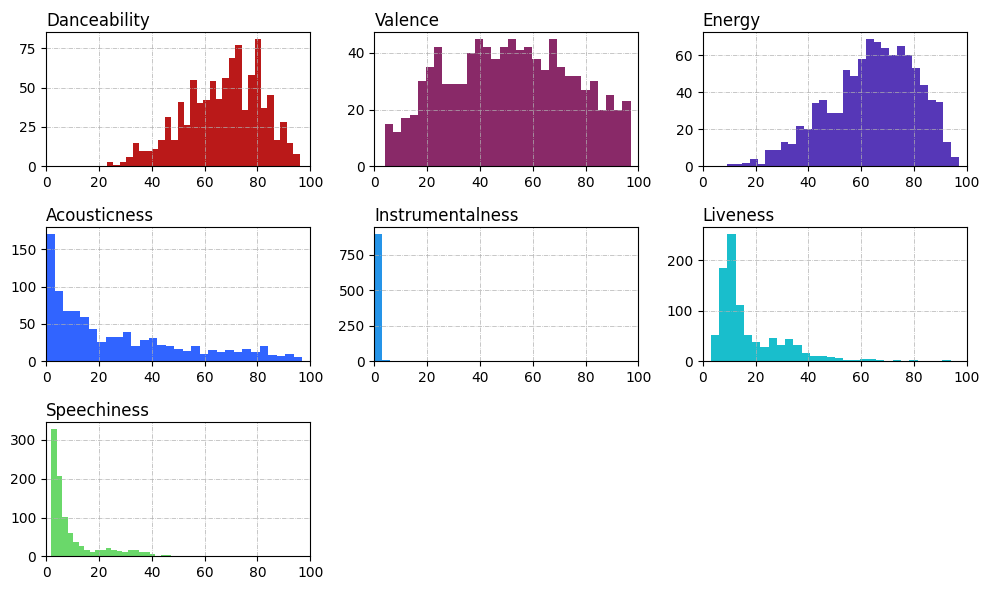

In [20]:
#columns to use
song_char = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
chart_title = ['Danceability', 'Valence', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
chart_colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a"]

#setting up subplots grids
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 6)) 
axes_flat = axes.flatten()

#iteration to fill up each histogram
for i, col in enumerate(song_char):
    axes_flat[i].hist(myData[col], bins = 30, alpha = 0.9, color = chart_colors[i])
    axes_flat[i].set_title(' ')
    axes_flat[i].set_xlim([0, 100])
    axes_flat[i].grid(True, which = 'both', ls = '-.', lw = 0.5)
    axes_flat[i].text(0, 1.15, chart_title[i], transform=axes_flat[i].transAxes, fontsize=12, verticalalignment='top')

#clean the empty subplot grid
axes_flat[-1].axis('off')
axes_flat[-2].axis('off')

plt.tight_layout()
plt.show()



**Findings: Characteristics distribution**
- Many songs in the dataset have high danceability scores, suggesting a preference for danceable tracks.
- Valence is spread out, indicating a variety of moods in the songs, from sad to happy.
- A significant portion of songs exhibit high energy, which might correlate with the danceability observation.
- The low acousticness in most songs suggests a preference for electronically produced tracks over purely acoustic ones.
- Instrumentalness is low for the vast majority, indicating that fully instrumental tracks are less common.
- The low liveness scores in most songs likely point to studio recordings rather than live performances.
- Low speechiness in most tracks suggests that pure speech or spoken-word tracks are less common, and melodic content dominates.

**Characteristics vs Popularity correlation**<br>
Next, I will explore the correlation between the characteristics and the popularity.

In [21]:
myData.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'streams_formatted'],
      dtype='object')

In [22]:
#create new dataframe with a ranking, picking only the relevant columns
characteristics = myData[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
characteristics = characteristics.sort_values(by='streams', ascending=False)
characteristics = characteristics.reset_index(drop=True)
characteristics['ranking'] = characteristics.index + 1
characteristics


,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,ranking
0,3703895074,50,38,80,0,0,9,7,1
1,3562543890,83,93,65,58,0,9,8,2
2,2887241814,50,45,41,75,0,11,3,3
3,2864791672,82,54,59,69,0,18,10,4
4,2808096550,76,91,50,54,0,7,5,5
...,...,...,...,...,...,...,...,...,...
947,14780425,56,48,73,0,0,35,4,948
948,11956641,93,68,65,42,0,12,25,949
949,11599388,79,92,89,5,0,6,5,950
950,1365184,82,62,74,10,0,33,7,951


**BPM distribution**<br>
Next, let's explore the distribution of the song's tempo.  
Tempo, often measured in Beats Per Minute (BPM), represents the speed or pace of a song.

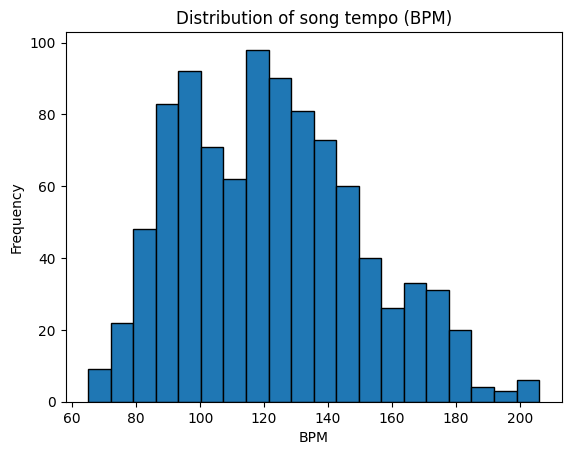

In [23]:
myData['bpm'].plot(kind='hist', bins=20, edgecolor='black') #plot the histogram
plt.title("Distribution of song tempo (BPM)") #title
plt.xlabel("BPM") #label title
plt.show()

**Findings: BPM distribution**<br>
The BPM data shows two main areas where songs are most common: one around 95-100 bpm and another between 115-122 bpm. There's a clear drop in songs from 101-113 bpm, but then it picks up again around 113-114 bpm. 
This suggests that most songs are made in these popular BPM ranges, and not many songs are very slow (below 80 bpm) or very fast (above 180 bpm).

I want to zoom in and look closer at this steep drop between 101-113

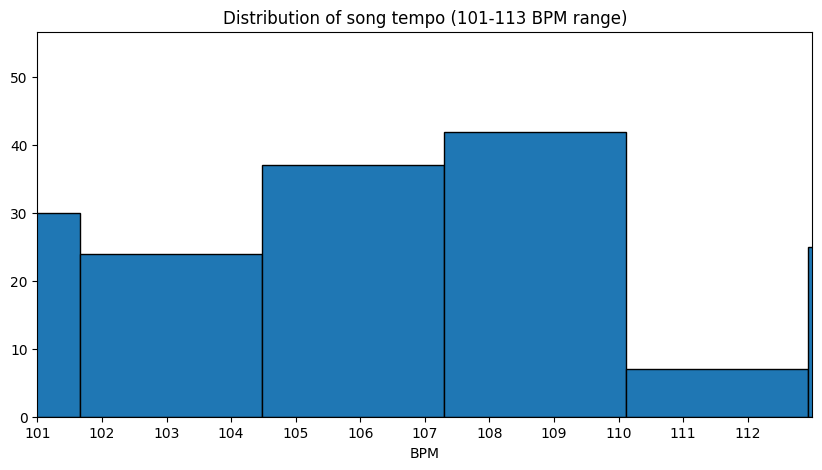

In [24]:
fig, ax = plt.subplots(figsize=(10, 5)) #setup the shape of the plot, figure size width=10, height=5
ax.hist(myData['bpm'], bins=50, edgecolor='black') #define the dataset, and the bin count, 
ax.set_title("Distribution of song tempo (101-113 BPM range)")
ax.set_xlabel("BPM")
ax.set_xlim(101, 113) #This makes the zoom-in effect. Set limit of the x axis, to show bpm values starting from 101 to 113. 
ax.set_xticks(np.arange(101, 113, 1)) #This supports the zoom-in effect. Set the x labels to show values in increments of 1. 
plt.show()

**Findings: BPM distribution (Zoomed-in)**<br>
Based on the data for the most streamed songs on Spotify in 2023, the tempo range of 110-113 BPM appears to be less frequently used by songwriters.

**BPM-Characteristics correlation**<br>
Next, I will explore the potential correlation between a song's tempo (BPM) and its various characteristics, such as energy and danceability. The goal is to determine whether these attributes have a notable relationship with a song's BPM.

In [25]:
myData.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'streams_formatted'],
      dtype='object')

In [26]:
#new dataframe, selecting only the columns to use
bpm = myData[['track_name', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [27]:
#sort stream count, descending order
bpm = bpm.sort_values(by='streams', ascending=False) 

In [28]:
#reset the index number
bpm = bpm.reset_index(drop=True) 

In [29]:
#get the new reset index value and store it as a new column 'ranking'
bpm['Ranking'] = bpm.index + 1 

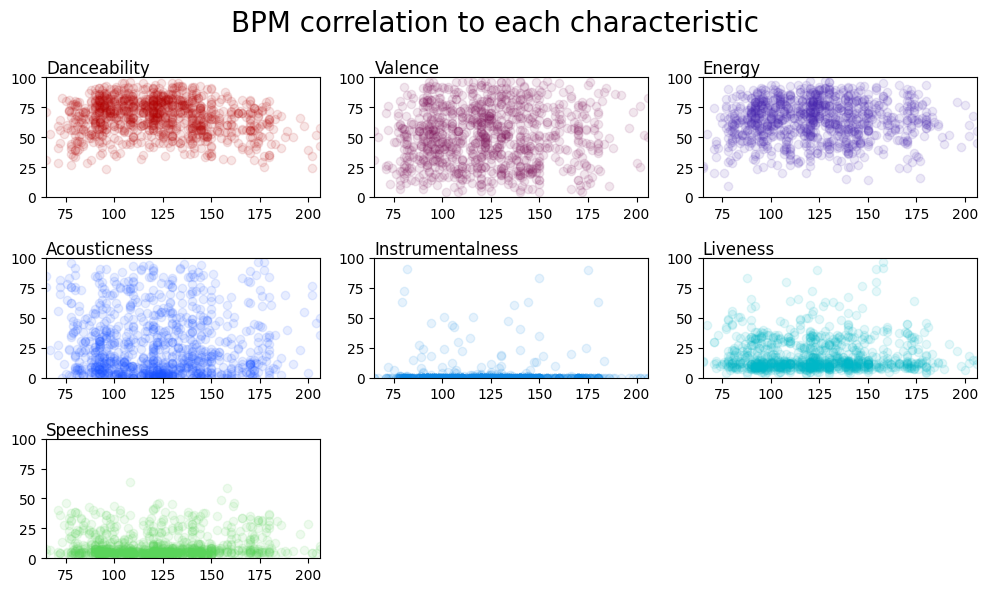

In [30]:
#setting up subplots grids
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 6)) 
fig.suptitle("BPM correlation to each characteristic", fontsize=20)
axes_flat = axes.flatten()

#iteration to fill up each histogram
for i, col in enumerate(song_char):
    axes_flat[i].scatter(x= bpm['bpm'], y=bpm[col], alpha = 0.1, color = chart_colors[i])
    axes_flat[i].set_title(' ')
    axes_flat[i].set_xlim([65, 206])
    axes_flat[i].set_ylim([0, 100])
    #axes_flat[i].grid(True, which = 'both', ls = '-.', lw = 0.5)
    axes_flat[i].text(0, 1.15, chart_title[i], transform=axes_flat[i].transAxes, fontsize=12, verticalalignment='top')

#clean the empty subplot grid
axes_flat[-1].axis('off')
axes_flat[-2].axis('off')

plt.tight_layout()
plt.show()

In [31]:
#use corr function and run it for each characteristic versus the bpm
correlations = {col: bpm['bpm'].corr(bpm[col]) for col in song_char}
corr_series = pd.Series(correlations) #convert
#print(corr_series)
corr_series.describe()


count    7.000000
mean    -0.008745
std      0.065211
min     -0.147630
25%     -0.009674
50%     -0.000803
75%      0.032435
max      0.041693
dtype: float64

**Findings: BPM-Characteristics correlation**<br>
The charts shows that the data points are scattered all over the plot and there is no evident trend or pattern. Considering the result of the correlation function along with the chart, the data tells us that a song's BPM has no correlation to any of its characteristics. This means that a song can have a slow tempo and be danceable or energetic, or it can also mean that a song can have a fast tempo while having low valence (a sad or negative sounding song).

In [32]:
myData.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'streams_formatted'],
      dtype='object')

**Key (Music)**<br>
In music theory, the key of a piece/song is the group of pitches, or scale, that forms the basis of a musical composition. 
The term "key" often specifies a particular note (C, D, E, F, etc.) combined with a mode (major or minor).
Most of the time, music in a major key is judged as happy while minor key music is heard as sad. 

In the next section, let's check the distribution of `key` and `mode` in our dataset.

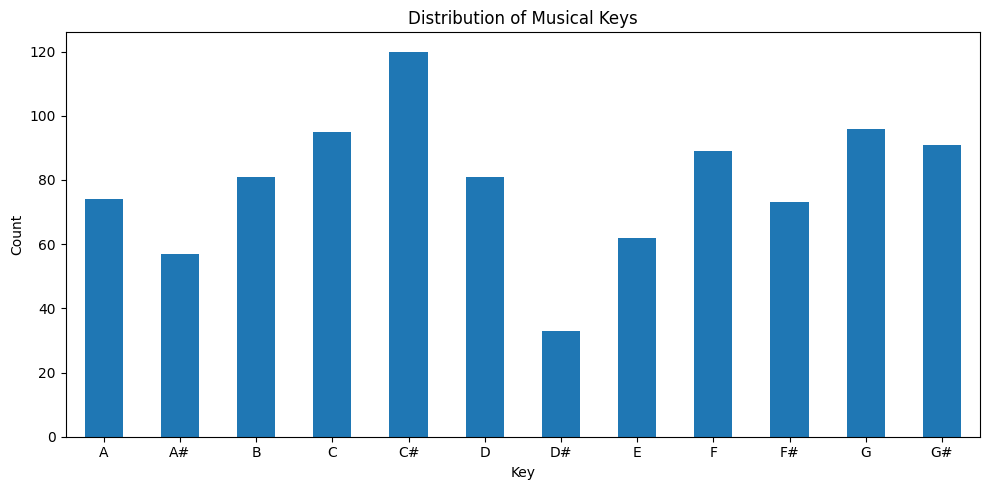

In [42]:
# Count the occurrence of each key
key_counts = myData['key'].value_counts()

# Sort by key for the visualization
key_counts = key_counts.sort_index()

# Plot
key_counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


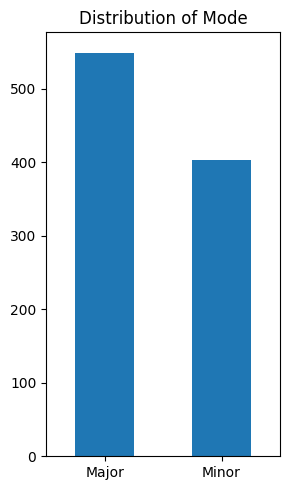

In [67]:
mode_counts = myData['mode'].value_counts()
mode_counts = mode_counts.sort_index()
mode_counts.plot(kind='bar', figsize=(3,5))
plt.title('Distribution of Mode')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

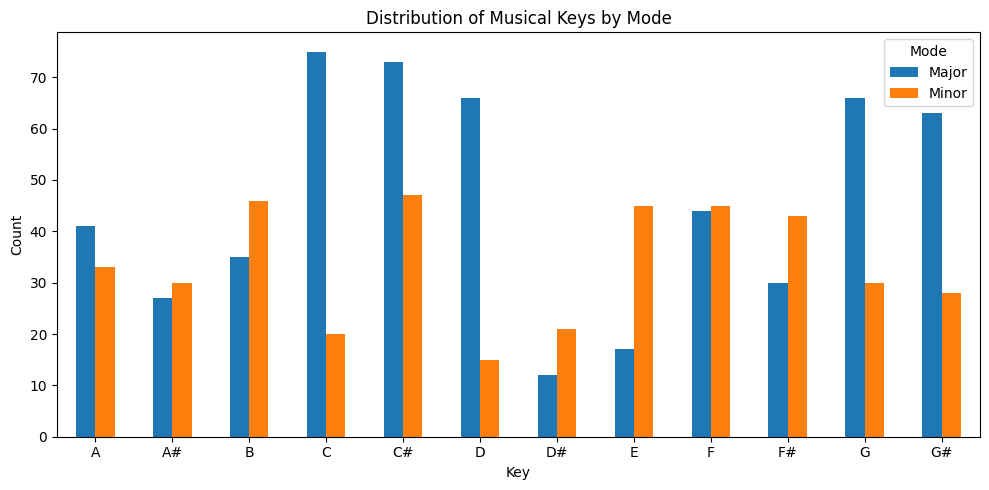

In [76]:
# Create a pivot table for key-mode combinations
pivot_table = myData.pivot_table(index='key', columns='mode', aggfunc='size', fill_value=0)

# Plot stacked bar chart
pivot_table.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Musical Keys by Mode')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Mode')
plt.show()


**Findings: Key (Music)**<br>

The data suggests that songs in Major is prevalent in keys of C, C#, G and G# and Minor is prevalent in songs in keys of B, D#, E and F# while the rest of the keys do not have a significant difference in between Major and Minor. 

This insight appears to be directly supported by our previous analysis in the song's cahracteristic 'Valence' 
"- Valence is spread out, indicating a variety of moods in the songs, from sad to happy."